In [ ]:
import pickle
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# 꼭 실행 전에 데이터 파일 업로드가 필요합니다!!!!!
LOAD_FILE_NAME = 'processed_traffic_data_26feats.pkl'

# 전처리된 피처 & 라벨 로드
with open(LOAD_FILE_NAME, 'rb') as f:
    loaded_data = pickle.load(f)

X_mon_clean   = loaded_data['X_mon_clean']
X_unmon_clean = loaded_data['X_unmon_clean']
y_mon_clean   = loaded_data['y_mon_clean']
X_all         = loaded_data['X_all']
y_bin         = loaded_data['y_bin']
y_multi       = loaded_data['y_multi']
FINAL_26_FEATS = loaded_data['feature_names']



###########################################################
####### ⚔️ MODEL BATTLE: FINDING THE BEST CLASSIFIER #######
###########################################################
Model                | Accuracy   | Macro F1   | Time      
------------------------------------------------------------
Decision Tree        | 0.6686     | 0.6352     | 2.13s
k-NN                 | 0.6401     | 0.6010     | 0.46s
Naive Bayes          | 0.3415     | 0.2609     | 0.08s
Logistic Regression  | 0.4557     | 0.3919     | 15.06s
SVM (RBF)            | 0.6018     | 0.5405     | 9.72s
Random Forest        | 0.8186     | 0.7859     | 20.36s
MLP (Neural Net)     | 0.6842     | 0.6438     | 136.98s

🏆 Final Leaderboard 🏆


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Macro F1,Time (s)
5,Random Forest,0.818564,0.785858,20.362970
6,MLP (Neural Net),0.684166,0.643835,136.980583
0,Decision Tree,0.668627,0.635222,2.130713
1,k-NN,0.640067,0.600996,0.455729
4,SVM (RBF),0.601848,0.540536,9.723030
3,Logistic Regression,0.455691,0.391901,15.062374
2,Naive Bayes,0.341453,0.260881,0.079315


/tmp/ipython-input-2801086657.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_res, x="Accuracy", y="Model", palette="viridis")


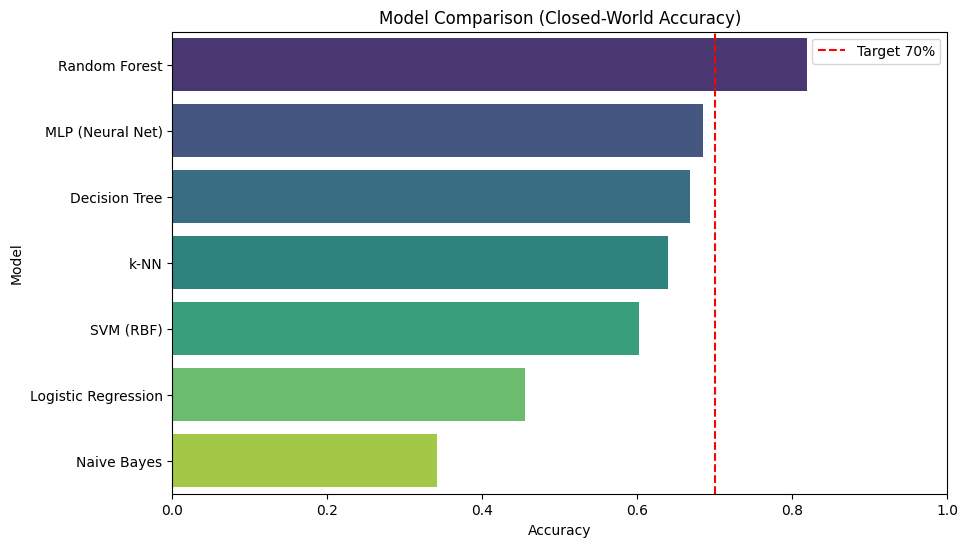

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier  # 💡 MLP 라이브러리 추가
from sklearn.metrics import accuracy_score, f1_score

print("\n###########################################################")
print("####### ⚔️ MODEL BATTLE: FINDING THE BEST CLASSIFIER #######")
print("###########################################################")

# 1. 데이터 준비
# (X_mon_clean, y_mon_clean 변수 사용)
X_train, X_test, y_train, y_test = train_test_split(
    X_mon_clean, y_mon_clean, test_size=0.2, stratify=y_mon_clean, random_state=42
)

# 2. 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 3. 비교할 모델 라인업 정의
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000),
    "SVM (RBF)": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42),
    # 💡 MLP 추가 (은닉층 2개, 최대 반복 500회 설정)
    "MLP (Neural Net)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# 4. 학습 및 평가 루프
results = []

print(f"{'Model':<20} | {'Accuracy':<10} | {'Macro F1':<10} | {'Time':<10}")
print("-" * 60)

for name, model in models.items():
    start = time.time()

    # 학습 (MLP 등 거리/기울기 기반 모델은 스케일링된 데이터 필수)
    model.fit(X_train_sc, y_train)

    # 예측
    pred = model.predict(X_test_sc)

    end = time.time()
    duration = end - start

    # 평가
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')

    print(f"{name:<20} | {acc:.4f}     | {f1:.4f}     | {duration:.2f}s")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro F1": f1,
        "Time (s)": duration
    })

# 5. 결과 시각화
df_res = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print("\n🏆 Final Leaderboard 🏆")
display(df_res)

# 바 차트 (Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_res, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Comparison (Closed-World Accuracy)")
plt.xlim(0, 1.0)
plt.axvline(0.7, color='red', linestyle='--', label='Target 70%')
plt.legend()
plt.show()


###########################################################
####### 🔧 HYPERPARAMETER TUNING: RANDOM FOREST #######
###########################################################
>> Tuning in progress... (This may take a few minutes)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✅ Tuning Completed in 4826.77 seconds

🏆 Best Parameters Found:
   - n_estimators: 800
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_features: log2
   - max_depth: None
   - class_weight: None
   - bootstrap: False

🏆 Best Cross-Validation Accuracy: 0.7878

📢 [Final Evaluation] Tuned Random Forest
✅ Final Test Accuracy: 0.8139
✅ Final Macro F1    : 0.7806

📋 Classification Report (Top 10 Classes Preview):
              precision    recall  f1-score   support

           0     0.8235    0.7000    0.7568        20
           1     0.7429    0.8387    0.7879        31
           2     0.9091    0.9091    0.9091        33
           3     0.8947    0.8500    0.8718        20
           4     0.8276    0.8276    0.8276        29
           5     0.9643    0.8438    0.9000        32
           6     0.8750    0.9211    0.8974        38
           7     0.8000    0.9032    0.8485        31
           8     0.8235    0.7368    0.7778        19
           9     0.6875    0.7586   

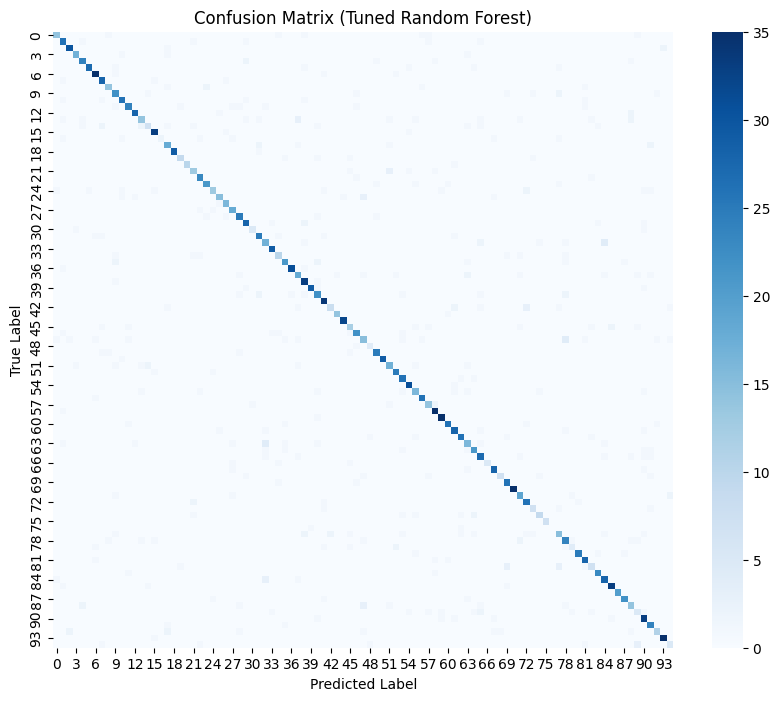

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

print("\n###########################################################")
print("####### 🔧 HYPERPARAMETER TUNING: RANDOM FOREST #######")
print("###########################################################")

# 1. 튜닝할 파라미터
param_dist = {
    'n_estimators': [200, 300, 500, 800],        # 트리의 개수 (많을수록 안정적)
    'max_depth': [20, 30, 40, 50, None],         # 트리의 깊이 (너무 깊으면 과적합)
    'min_samples_split': [2, 5, 10],             # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],               # 리프 노드에 있어야 할 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],      # 각 분할에서 고려할 피처의 수
    'bootstrap': [True, False],                  # 부트스트랩 샘플링 사용 여부
    'class_weight': ['balanced', 'balanced_subsample', None] # 불균형 가중치
}

# 2. 기본 모델 정의
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# 3. RandomizedSearchCV 설정
# n_iter=20: 20번의 랜덤 조합을 시도합니다. (시간과 성능의 균형)
# cv=3: 3-Fold 교차 검증을 수행합니다.
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy', # 평가 지표 (Closed-World는 Accuracy가 중요)
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# 4. 튜닝 시작
print(">> Tuning in progress... (This may take a few minutes)")
start_time = time.time()
random_search.fit(X_train_sc, y_train)
end_time = time.time()

print(f"✅ Tuning Completed in {end_time - start_time:.2f} seconds")

# 5. 최적 파라미터 및 점수 확인
best_rf_params = random_search.best_params_
print(f"\n🏆 Best Parameters Found:")
for param, value in best_rf_params.items():
    print(f"   - {param}: {value}")

print(f"\n🏆 Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")


# 6. 최적 모델로 최종 평가 (Test Set)
print("\n" + "="*60)
print("📢 [Final Evaluation] Tuned Random Forest")
print("="*60)

best_rf_model = random_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_sc)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro')

print(f"✅ Final Test Accuracy: {acc_tuned:.4f}")
print(f"✅ Final Macro F1    : {f1_tuned:.4f}")

# 상세 리포트 (너무 길면 생략 가능)
print("\n📋 Classification Report (Top 10 Classes Preview):")
print(classification_report(y_test, y_pred_tuned, labels=range(10), digits=4))
# 전체를 보려면 labels 인자 제거: print(classification_report(y_test, y_pred_tuned, digits=4))

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_tuned)
# 클래스가 많으므로 숫자(annot)는 생략하고 히트맵 패턴만 확인
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix (Tuned Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#########################################################
####### SCENARIO 2: IMBALANCE STRATEGY COMPARISON #######
#########################################################

>> [A] Running Undersampling...

📢 [Evaluation Result] RF (Undersampling)

✅ Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,Unmon_Recall,ROC-AUC
RF (Undersampling),0.832908,0.962482,0.840403,0.897309,0.783333,0.90757


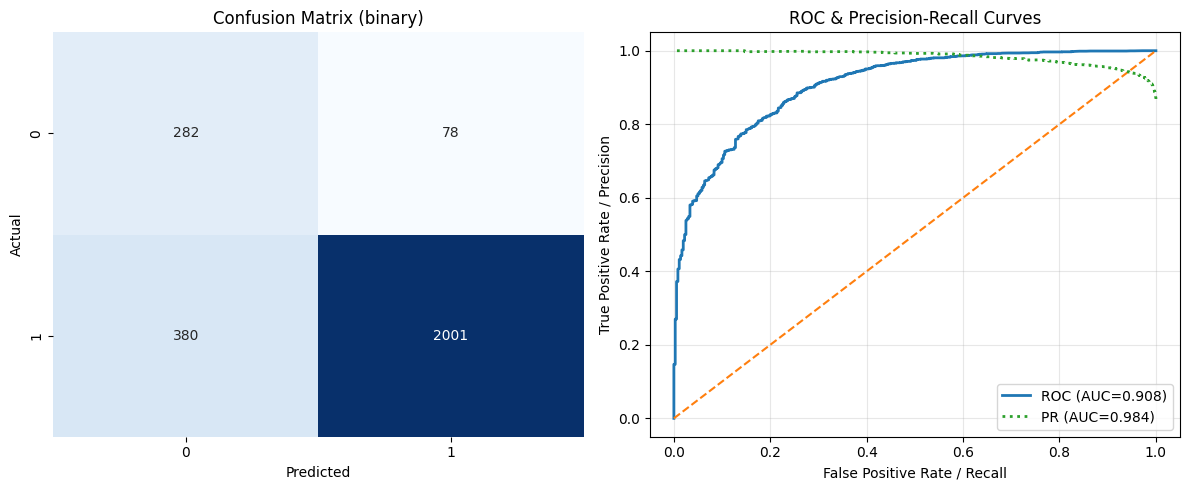


📋 Detailed Report:
                  precision    recall  f1-score   support

Unmonitored (-1)       0.43      0.78      0.55       360
   Monitored (1)       0.96      0.84      0.90      2381

        accuracy                           0.83      2741
       macro avg       0.69      0.81      0.72      2741
    weighted avg       0.89      0.83      0.85      2741


>> [B] Running SMOTE + Tomek...

📢 [Evaluation Result] RF (SMOTE+Tomek)

✅ Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,Unmon_Recall,ROC-AUC
RF (SMOTE+Tomek),0.91463,0.949728,0.952121,0.950923,0.666667,0.927789


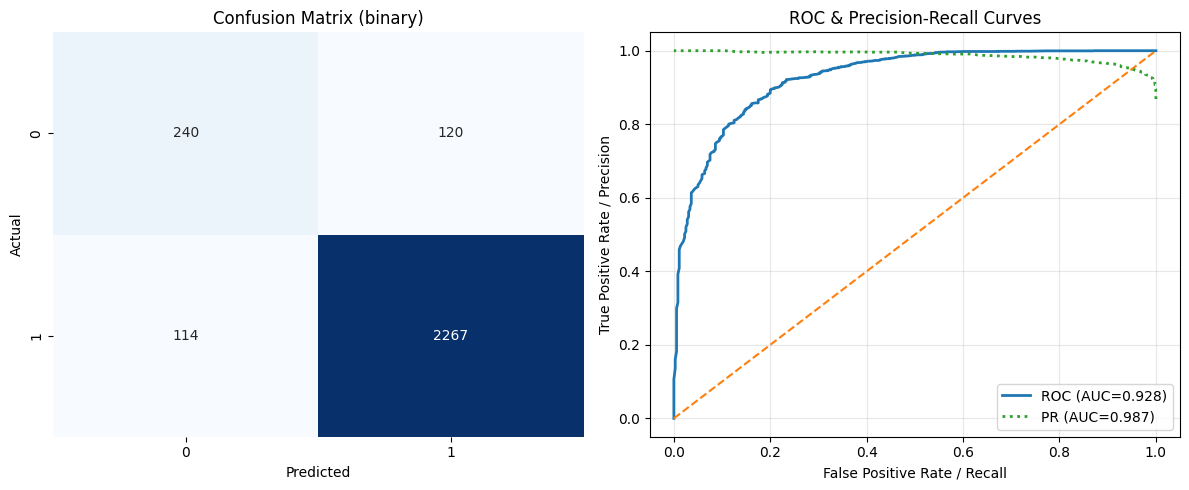


📋 Detailed Report:
                  precision    recall  f1-score   support

Unmonitored (-1)       0.68      0.67      0.67       360
   Monitored (1)       0.95      0.95      0.95      2381

        accuracy                           0.91      2741
       macro avg       0.81      0.81      0.81      2741
    weighted avg       0.91      0.91      0.91      2741



In [ ]:
from sklearn.utils import resample
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

print("\n#########################################################")
print("####### SCENARIO 2: IMBALANCE STRATEGY COMPARISON #######")
print("#########################################################")

# 1. 데이터 병합 및 레이블 생성
# Monitored=1, Unmonitored=-1
X_all = pd.concat([X_mon_clean, X_unmon_clean], axis=0).reset_index(drop=True)
y_bin = np.concatenate([np.ones(len(X_mon_clean)), np.full(len(X_unmon_clean), -1)])

# 2. 데이터 분리 (공통 Test Set)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_bin, test_size=0.2, stratify=y_bin, random_state=42
)

# 3. 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# --- [Strategy A] Undersampling ---
print("\n>> [A] Running Undersampling...")
# 클래스 분리
X_mon_tr = X_train_sc[y_train == 1]
y_mon_tr = y_train[y_train == 1]
X_unmon_tr = X_train_sc[y_train == -1]
y_unmon_tr = y_train[y_train == -1]

# Monitored를 Unmonitored 개수에 맞춰 줄임
X_mon_down, y_mon_down = resample(
    X_mon_tr, y_mon_tr, replace=False, n_samples=len(y_unmon_tr), random_state=42
)
# 결합
X_train_under = np.vstack((X_mon_down, X_unmon_tr))
y_train_under = np.hstack((y_mon_down, y_unmon_tr))

# 학습 & 평가
rf_under = RandomForestClassifier(n_estimators=300, max_depth=20, n_jobs=-1, random_state=42)
rf_under.fit(X_train_under, y_train_under)
evaluate_model_performance(rf_under, X_test_sc, y_test, "RF (Undersampling)", scenario="binary")

# --- [Strategy B] SMOTE + Tomek ---
print("\n>> [B] Running SMOTE + Tomek...")
try:
    smt = SMOTETomek(random_state=42)
    X_train_res, y_train_res = smt.fit_resample(X_train_sc, y_train)
except:
    print("   ⚠️ SMOTE Fallback")
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_sc, y_train)

# 학습 & 평가 (Depth 제한 해제 - 성능 최적화)
rf_smt = RandomForestClassifier(n_estimators=400, max_depth=None, n_jobs=-1, random_state=42)
rf_smt.fit(X_train_res, y_train_res)
evaluate_model_performance(rf_smt, X_test_sc, y_test, "RF (SMOTE+Tomek)", scenario="binary")


>> [A] Running Undersampling...

📢 [Evaluation Result] RF (Undersampling)

✅ Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,Unmon_Recall,ROC-AUC
RF (Undersampling),0.833273,0.9625,0.840823,0.897557,0.783333,0.908615


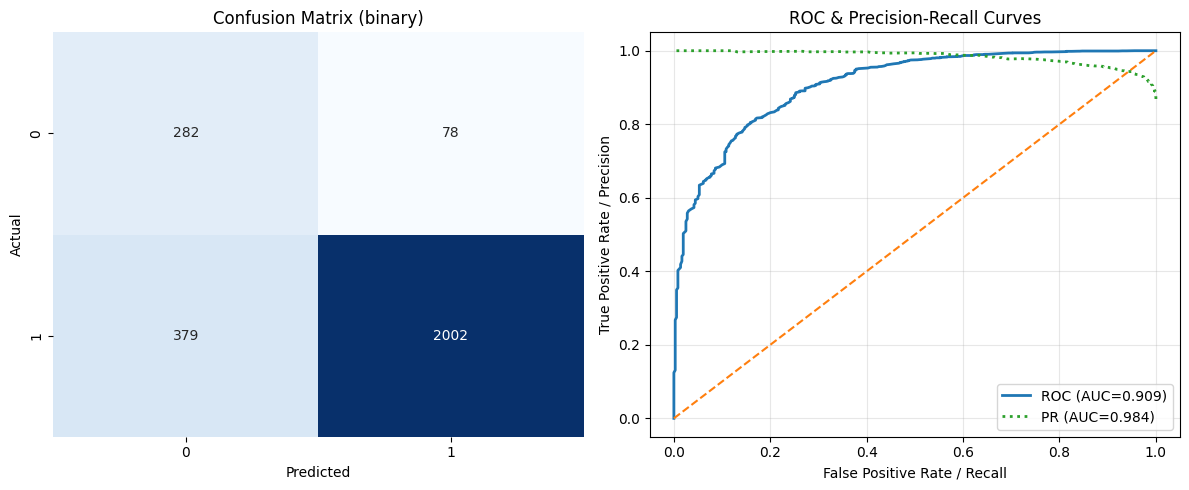


📋 Detailed Report:
                  precision    recall  f1-score   support

Unmonitored (-1)       0.43      0.78      0.55       360
   Monitored (1)       0.96      0.84      0.90      2381

        accuracy                           0.83      2741
       macro avg       0.69      0.81      0.72      2741
    weighted avg       0.89      0.83      0.85      2741


>> [B] Running SMOTE + Tomek...

📢 [Evaluation Result] RF (SMOTE+Tomek)

✅ Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,Unmon_Recall,ROC-AUC
RF (SMOTE+Tomek),0.91463,0.949728,0.952121,0.950923,0.666667,0.927789


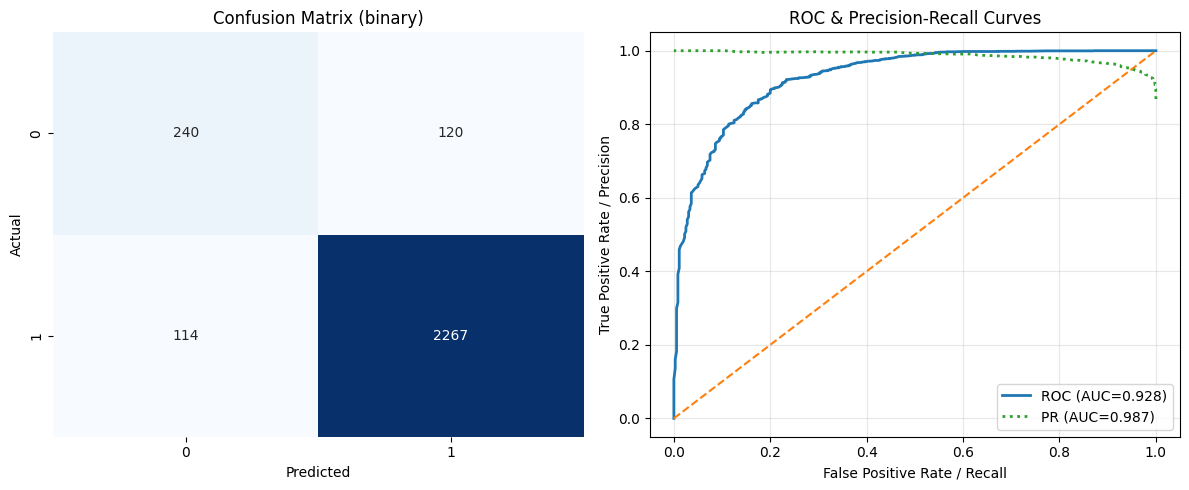


📋 Detailed Report:
                  precision    recall  f1-score   support

Unmonitored (-1)       0.68      0.67      0.67       360
   Monitored (1)       0.95      0.95      0.95      2381

        accuracy                           0.91      2741
       macro avg       0.81      0.81      0.81      2741
    weighted avg       0.91      0.91      0.91      2741



In [ ]:
# 🎯 공통 파라미터 정의 (변인 통제)
RF_PARAMS = {
    'n_estimators': 400,
    'max_depth': None,       # 둘 다 무제한으로 설정 (또는 30)
    'min_samples_split': 2,
    'n_jobs': -1,
    'random_state': 42
}

# --- [Strategy A] Undersampling ---
print("\n>> [A] Running Undersampling...")
# ... (데이터 준비 코드 동일) ...

# 학습 (공통 파라미터 사용)
rf_under = RandomForestClassifier(**RF_PARAMS)
rf_under.fit(X_train_under, y_train_under)
evaluate_model_performance(rf_under, X_test_sc, y_test, "RF (Undersampling)", scenario="binary")

# --- [Strategy B] SMOTE + Tomek ---
print("\n>> [B] Running SMOTE + Tomek...")
# ... (데이터 준비 코드 동일) ...

# 학습 (공통 파라미터 사용)
rf_smt = RandomForestClassifier(**RF_PARAMS)
rf_smt.fit(X_train_res, y_train_res)
evaluate_model_performance(rf_smt, X_test_sc, y_test, "RF (SMOTE+Tomek)", scenario="binary")


###########################################################
####### 🚀 BOOSTING F1-SCORE: THRESHOLD TUNING #######
###########################################################

🏆 Found Best Threshold: 0.5675
   -> Max Unmonitored F1-Score: 0.6758

📊 Tuned Performance (Threshold = 0.5675)
                  precision    recall  f1-score   support

Unmonitored (-1)       0.74      0.62      0.68       360
   Monitored (1)       0.94      0.97      0.96      2381

        accuracy                           0.92      2741
       macro avg       0.84      0.79      0.82      2741
    weighted avg       0.92      0.92      0.92      2741



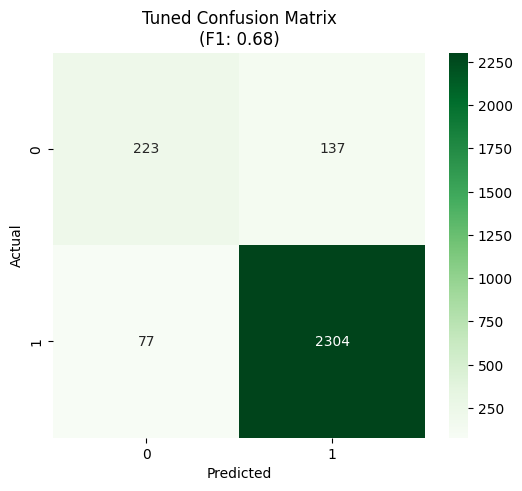

In [ ]:
import numpy as np
import time
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n###########################################################")
print("####### 🚀 BOOSTING F1-SCORE: THRESHOLD TUNING #######")
print("###########################################################")

# 1. 확률값 예측 (Unmonitored일 확률)
# SMOTE+Tomek 모델 사용
# classes_ 순서 확인: 보통 [-1, 1] 순서이므로 index 0이 Unmonitored(-1)일 확률
unmon_class_index = np.where(rf_smt.classes_ == -1)[0][0]
y_proba_unmon = rf_smt.predict_proba(X_test_sc)[:, unmon_class_index]

# 2. 정밀도-재현율 곡선에서 최적의 F1 Threshold 찾기
# pos_label=-1 지정 (Unmonitored를 Positive로 두고 F1을 계산)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_unmon, pos_label=-1)

# F1 Score 계산 (분모가 0이 되는 경우 방지)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"\n🏆 Found Best Threshold: {best_threshold:.4f}")
print(f"   -> Max Unmonitored F1-Score: {best_f1:.4f}")

# 3. 최적 임계값 적용하여 최종 예측
# 확률 >= best_threshold 이면 -1(Unmon), 아니면 1(Mon)
y_pred_tuned = np.where(y_proba_unmon >= best_threshold, -1, 1)

# 4. 최종 평가 결과 출력
print("\n" + "="*60)
print(f"📊 Tuned Performance (Threshold = {best_threshold:.4f})")
print("="*60)

print(classification_report(y_test, y_pred_tuned, target_names=['Unmonitored (-1)', 'Monitored (1)']))

# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"Tuned Confusion Matrix\n(F1: {best_f1:.2f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# =========================================================
# FULL EXPERIMENT FRAMEWORK (5 imbalance strategies)
# =========================================================

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import precision_recall_curve
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

# ---------------------------------------------------------
# Utility functions
# ---------------------------------------------------------
def eval_model(name, y_test, y_pred, probas=None):
    # classification report
    print(f"\n==================== {name} ====================")
    print(classification_report(y_test, y_pred, digits=4))

    # unmonitored F1 (label = -1)
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, labels=[-1,1], zero_division=0)
    unmon_f1 = f1[0]
    print(f"Unmonitored F1 = {unmon_f1:.4f}")

    # ROC-AUC 가능할 때만
    if probas is not None:
        bin_y = (y_test == 1).astype(int)
        try:
            auc = roc_auc_score(bin_y, probas[:,1])
            print(f"ROC-AUC = {auc:.4f}")
        except:
            pass

    print("================================================")
    return unmon_f1



# =========================================================
# 3) Class-Weighted RandomForest
# =========================================================
def run_weighted_rf():
    model = RandomForestClassifier(
        n_estimators=400,
        n_jobs=-1,
        random_state=42,
        class_weight={-1: 4, 1: 1}
    )
    model.fit(X_train_sc, y_train)

    prob = model.predict_proba(X_test_sc)
    y_pred = model.predict(X_test_sc)
    return eval_model("Class-Weighted RF", y_test, y_pred, probas=prob)


# =========================================================
# 4) Borderline-SMOTE + ENN
# =========================================================
def run_borderline_enn():
    bs = BorderlineSMOTE(kind='borderline-1', random_state=42)
    enn = EditedNearestNeighbours()

    X_over, y_over = bs.fit_resample(X_train_sc, y_train)
    X_clean, y_clean = enn.fit_resample(X_over, y_over)

    model = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
    model.fit(X_clean, y_clean)

    prob = model.predict_proba(X_test_sc)
    y_pred = model.predict(X_test_sc)
    return eval_model("Borderline-SMOTE + ENN", y_test, y_pred, probas=prob)


# =========================================================
# 5) ADASYN
# =========================================================
def run_adasyn():
    ada = ADASYN(random_state=42)
    X_ad, y_ad = ada.fit_resample(X_train_sc, y_train)

    model = RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)
    model.fit(X_ad, y_ad)

    prob = model.predict_proba(X_test_sc)
    y_pred = model.predict(X_test_sc)
    return eval_model("ADASYN RF", y_test, y_pred, probas=prob)


# =========================================================
# 6) BalancedRandomForest
# =========================================================
def run_balanced_rf():
    model = BalancedRandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_sc, y_train)

    prob = model.predict_proba(X_test_sc)
    y_pred = model.predict(X_test_sc)
    return eval_model("BalancedRandomForest", y_test, y_pred, probas=prob)


# =========================================================
# 7) XGBoost (scale_pos_weight)
# =========================================================
def run_xgboost():
    y_bin = (y_train == 1).astype(int)
    neg = sum(y_bin == 0)
    pos = sum(y_bin == 1)

    model = xgb.XGBClassifier(
        n_estimators=400,
        max_depth=6,
        eval_metric='logloss',
        scale_pos_weight=neg / (pos + 1e-9),
        random_state=42
    )
    model.fit(X_train_sc, y_bin)

    prob = model.predict_proba(X_test_sc)
    y_pred = np.where(prob[:,1] >= 0.5, 1, -1)
    return eval_model("XGBoost", y_test, y_pred, probas=prob)



# ---------------------------------------------------------
# ALL EXPERIMENTS RUN
# ---------------------------------------------------------
results = {}

results["Weighted RF"] = run_weighted_rf()
results["Borderline+ENN"] = run_borderline_enn()
results["ADASYN"] = run_adasyn()
results["Balanced RF"] = run_balanced_rf()
results["XGBoost"] = run_xgboost()

print("\n========= FINAL SUMMARY (Unmonitored F1) =========")
for k,v in results.items():
    print(f"{k:20s}: {v:.4f}")
print("=================================================\n")


==================== Class-Weighted RF ====================
              precision    recall  f1-score   support

        -1.0     0.9669    0.4056    0.5714       360
         1.0     0.9174    0.9979    0.9559      2381

    accuracy                         0.9201      2741
   macro avg     0.9421    0.7017    0.7637      2741
weighted avg     0.9239    0.9201    0.9054      2741

Unmonitored F1 = 0.5714
ROC-AUC = 0.9297

==================== Borderline-SMOTE + ENN ====================
              precision    recall  f1-score   support

        -1.0     0.5161    0.7111    0.5981       360
         1.0     0.9537    0.8992    0.9256      2381

    accuracy                         0.8745      2741
   macro avg     0.7349    0.8052    0.7619      2741
weighted avg     0.8962    0.8745    0.8826      2741

Unmonitored F1 = 0.5981
ROC-AUC = 0.9134

==================== ADASYN RF ====================
              precision    recall  f1-score   support

        -1.0     0.6418    0.


#############################################################
####### SCENARIO 3: OPEN-WORLD MULTI-CLASS (TUNING) #########
#############################################################
>> Tuning Random Forest for Multi-Class...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
✅ Tuning Done (631.41s)
✅ Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}

📢 [Evaluation Result] RF (Multi-Class Tuned)

✅ Performance Metrics:


,Accuracy,Precision,Recall,F1-Score (Macro),Unmon_Recall
RF (Multi-Class Tuned),0.77344,0.780409,0.736481,0.748801,0.738889


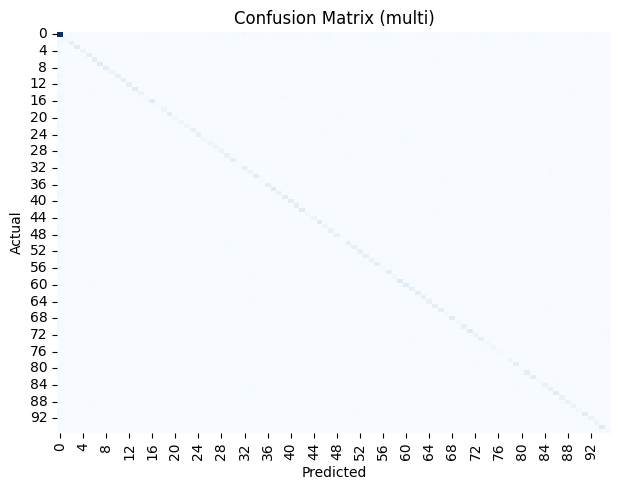

In [ ]:
print("\n#############################################################")
print("####### SCENARIO 3: OPEN-WORLD MULTI-CLASS (TUNING) #########")
print("#############################################################")

# 1. 레이블 준비 (Mon=0~94, Unmon=-1)
# y_mon_clean은 이미 0~94 레이블
y_unmon_multi = np.full(len(X_unmon_clean), -1)
y_multi = np.concatenate([y_mon_clean, y_unmon_multi])

# 2. 데이터 분리
# X_all.values 사용 (DataFrame -> Numpy)
X_train, X_test, y_train, y_test = train_test_split(
    X_all.values, y_multi, test_size=0.2, stratify=y_multi, random_state=42
)

# 3. 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 4. 튜닝 (RandomizedSearchCV)
print(">> Tuning Random Forest for Multi-Class...")
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Multi-class에 맞는 파라미터 탐색
param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [30, 50, None], # 복잡한 패턴을 위해 깊게
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

search = RandomizedSearchCV(
    rf_base, param_dist, n_iter=5, cv=3,
    scoring='f1_macro', n_jobs=-1, random_state=42, verbose=1
)

start = time.time()
search.fit(X_train_sc, y_train)
end = time.time()

best_rf_multi = search.best_estimator_
print(f"✅ Tuning Done ({end - start:.2f}s)")
print(f"✅ Best Params: {search.best_params_}")

# 5. 평가
evaluate_model_performance(best_rf_multi, X_test_sc, y_test, "RF (Multi-Class Tuned)", scenario="multi")

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

print("\n################################################################")
print("####### SCENARIO 4: TWO-STAGE HIERARCHICAL MODEL #######")
print("####### (Stage 1: Detection -> Stage 2: Identification) #######")
print("################################################################")

# 1. 데이터 분리 (전체 Open-World 데이터 사용)
# X_all: 전체 피처, y_multi: 전체 레이블 (-1 ~ 94)
print(">> Splitting Data (Train/Test)...")

# y_multi를 기준으로 층화 추출(Stratify)하여 테스트셋 구성
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_multi, test_size=0.2, stratify=y_multi, random_state=42
)

# 2. 스케일링
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


# =========================================================
# 🟢 Stage 1: Binary Detector (감시 vs 비감시)
# =========================================================
print("\n>> [Stage 1] Training Binary Detector (with SMOTE+Tomek)...")

# 1-1. 이진 레이블 생성 (Unmonitored=-1, Monitored=1)
# y_train은 -1과 0~94가 섞여 있음. 이를 -1과 1로 변환
y_train_bin = np.where(y_train == -1, -1, 1)

# 1-2. 불균형 해소 (Detection 성능의 핵심!)
try:
    smt = SMOTETomek(random_state=42)
    X_train_res, y_train_res = smt.fit_resample(X_train_sc, y_train_bin)
    print("   ✅ SMOTE+Tomek Applied.")
except:
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_sc, y_train_bin)
    print("   ⚠️ SMOTE Applied (Fallback).")

# 1-3. Binary 모델 학습 (Recall 최적화를 위해 Depth 제한 해제)
rf_binary = RandomForestClassifier(
    n_estimators=500,        # 튜닝 결과
    min_samples_split=2,     # 튜닝 결과
    max_features='sqrt',     # 튜닝 결과
    max_depth=None,          # 튜닝 결과 (깊이 제한 해제)
    class_weight='balanced', # 불균형 클래스 가중치
    n_jobs=-1,
    random_state=42
)
rf_binary.fit(X_train_res, y_train_res)
print("   ✅ Stage 1 Model Trained.")


# =========================================================
# 🔵 Stage 2: Closed-World Identifier (95개 구분)
# =========================================================
print("\n>> [Stage 2] Training Closed-World Identifier...")

# 2-1. Monitored 데이터만 필터링 (학습용)
# 훈련 데이터 중에서 레이블이 -1이 아닌 것만 골라냄
mon_mask = (y_train != -1)
X_train_closed = X_train_sc[mon_mask]
y_train_closed = y_train[mon_mask]

# 2-2. Closed 모델 학습 (95개 클래스 분류 전문)
rf_closed = RandomForestClassifier(
    n_estimators=400,
    max_depth=30,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf_closed.fit(X_train_closed, y_train_closed)
print("   ✅ Stage 2 Model Trained.")


# =========================================================
# 🚀 3. Two-Stage 통합 예측 (Inference)
# =========================================================
print("\n>> Running Two-Stage Inference on Test Set...")
start_time = time.time()

# Step 1: 탐지 (Detection)
# 전체 테스트 셋에 대해 -1(Unmonitored)인지 1(Monitored)인지 예측
pred_stage1 = rf_binary.predict(X_test_sc)

# 최종 예측 배열 초기화 (기본값을 -1로 설정)
final_pred = np.full_like(y_test, -1)

# Step 2: 식별 (Identification)
# 1단계에서 'Monitored(1)'라고 통과된 샘플만 2단계 모델로 보냄
monitored_indices = np.where(pred_stage1 == 1)[0]

if len(monitored_indices) > 0:
    # 통과된 샘플들만 추출하여 95개 중 하나로 분류
    X_mon_candidate = X_test_sc[monitored_indices]
    pred_stage2 = rf_closed.predict(X_mon_candidate)

    # 결과 업데이트 (1 -> 구체적인 클래스 0~94로 변경)
    final_pred[monitored_indices] = pred_stage2

end_time = time.time()


# =========================================================
# 📊 4. 최종 평가 (Evaluation)
# =========================================================
print(f"\n{'='*60}")
print("📢 [Final Result] Two-Stage Hierarchical Model")
print(f"{'='*60}")

# 주요 지표 계산
acc = accuracy_score(y_test, final_pred)
f1_macro = f1_score(y_test, final_pred, average='macro')

# Unmonitored Recall (실제 -1인 것 중, -1로 예측한 비율)
unmon_mask = (y_test == -1)
unmon_recall = np.mean(final_pred[unmon_mask] == -1)

print(f"✅ Overall Accuracy    : {acc:.4f}")
print(f"✅ Macro F1-Score      : {f1_macro:.4f}")
print(f"✅ Unmonitored Recall  : {unmon_recall:.4f} (거부율)")
print(f"✅ Inference Time      : {end_time - start_time:.2f}s")

print("\n--- Confusion Matrix (Unmonitored Focus) ---")
cm = confusion_matrix(y_test, final_pred, labels=[-1] + list(range(95)))
true_unmon = cm[0, 0]
false_mon = np.sum(cm[0, 1:]) # Unmonitored인데 Monitored 중 하나로 오판 (False Alarm)

print(f"True Unmonitored (-1 -> -1): {true_unmon}")
print(f"False Alarm      (-1 -> Mon): {false_mon}")
print(f"False Alarm Rate            : {false_mon / (true_unmon + false_mon):.2%}")


################################################################
####### SCENARIO 4: TWO-STAGE HIERARCHICAL MODEL #######
####### (Stage 1: Detection -> Stage 2: Identification) #######
################################################################
>> Splitting Data (Train/Test)...

>> [Stage 1] Training Binary Detector (with SMOTE+Tomek)...
   ✅ SMOTE+Tomek Applied.
   ✅ Stage 1 Model Trained.

>> [Stage 2] Training Closed-World Identifier...
   ✅ Stage 2 Model Trained.

>> Running Two-Stage Inference on Test Set...

📢 [Final Result] Two-Stage Hierarchical Model
✅ Overall Accuracy    : 0.7607
✅ Macro F1-Score      : 0.7346
✅ Unmonitored Recall  : 0.6694 (거부율)
✅ Inference Time      : 0.68s

--- Confusion Matrix (Unmonitored Focus) ---
True Unmonitored (-1 -> -1): 241
False Alarm      (-1 -> Mon): 119
False Alarm Rate            : 33.06%
